In [158]:
import pandas as pd

In [159]:
customers = pd.read_json('customers_data.json') # read the json
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  5 non-null      object
 1   Name        5 non-null      object
 2   JoinDate    5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


In [160]:
sales = pd.read_csv('sales_data_raw.csv') # Read the csv
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    10 non-null     object 
 1   CustomerID       10 non-null     object 
 2   TransactionDate  10 non-null     object 
 3   Product          10 non-null     object 
 4   Quantity         10 non-null     int64  
 5   Price            10 non-null     int64  
 6   Discount         10 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 692.0+ bytes


In [161]:
# How would you transform the TransactionDate in the sales data and the JoinDate in the customer data into proper datetime objects using Pandas?

# Transform TransactionDate using to_datetime
sales.TransactionDate = pd.to_datetime(sales.TransactionDate)
sales.dtypes

TransactionID              object
CustomerID                 object
TransactionDate    datetime64[ns]
Product                    object
Quantity                    int64
Price                       int64
Discount                  float64
dtype: object

In [162]:
# Transform JoinDate in the customer data using to_datetime
customers.JoinDate = pd.to_datetime(customers.JoinDate)
customers.dtypes

CustomerID            object
Name                  object
JoinDate      datetime64[ns]
dtype: object

In [163]:
# Final Transaction Amount = (Quantity × Price) × (1 – Discount)
# Write a function to calculate the final transaction amount given the columns Quantity, Price, and Discount.

sales = sales.assign(FinalTransactionAmount = (lambda x: (x.Quantity * x.Price) * (1 - x.Discount)))
# Used .assign() and lambda to assign the value

In [164]:
sales

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount,FinalTransactionAmount
0,T001,C001,2023-01-01,Widget,2,10,0.00,20.00
1,T002,C002,2023-01-05,Gadget,1,20,0.10,18.00
2,T003,C003,2023-01-07,Widget,3,10,0.00,30.00
3,T004,C002,2023-01-10,Gizmo,5,15,0.05,71.25
4,T005,C001,2023-01-12,Widget,1,10,0.00,10.00
5,T006,C004,2023-01-15,Gadget,2,20,0.20,32.00
6,T007,C005,2023-01-18,Widget,4,10,0.00,40.00
7,T008,C002,2023-01-20,Gizmo,3,15,0.10,40.50
8,T009,C003,2023-01-22,Widget,5,10,0.00,50.00
9,T010,C005,2023-01-25,Gadget,3,20,0.15,51.00


In [165]:
# Explain how you would join the sales data with the customer data. Which column is the appropriate key to use?

# I will use .merge() and I think the most appropriate is inner join since it removes unmatched data, 
# and based on the given dataset, all rows matched.
customer_sales = customers.merge(sales, on = 'CustomerID', how = 'inner')

In [166]:
customer_sales

,CustomerID,Name,JoinDate,TransactionID,TransactionDate,Product,Quantity,Price,Discount,FinalTransactionAmount
0,C001,Alice,2022-12-01,T001,2023-01-01,Widget,2,10,0.00,20.00
1,C001,Alice,2022-12-01,T005,2023-01-12,Widget,1,10,0.00,10.00
2,C002,Bob,2022-11-15,T002,2023-01-05,Gadget,1,20,0.10,18.00
3,C002,Bob,2022-11-15,T004,2023-01-10,Gizmo,5,15,0.05,71.25
4,C002,Bob,2022-11-15,T008,2023-01-20,Gizmo,3,15,0.10,40.50
5,C003,Charlie,2023-01-05,T003,2023-01-07,Widget,3,10,0.00,30.00
6,C003,Charlie,2023-01-05,T009,2023-01-22,Widget,5,10,0.00,50.00
7,C004,Diana,2023-01-10,T006,2023-01-15,Gadget,2,20,0.20,32.00
8,C005,Evan,2023-01-20,T007,2023-01-18,Widget,4,10,0.00,40.00
9,C005,Evan,2023-01-20,T010,2023-01-25,Gadget,3,20,0.15,51.00


In [167]:
# What method in Pandas would you use to identify and remove duplicate rows in the sales data?

# I could use .duplicated to identify and .drop_duplicates to remove
sales.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [168]:
# And I could use .drop_duplicates() to remove
sales = sales.drop_duplicates()

In [169]:
# After transforming the data, list two different methods you might use to load the data into a target system,
# including any relevant libraries or functions.

# I could use df.to_csv() to export the file, and import it via pd.read_csv() to load it in a dataframe using pandas
customer_sales.to_csv('customer_sales.csv')

In [170]:
# Import csv
df = pd.read_csv('customer_sales.csv')
df.head()

,Unnamed: 0,CustomerID,Name,JoinDate,TransactionID,TransactionDate,Product,Quantity,Price,Discount,FinalTransactionAmount
0,0,C001,Alice,2022-12-01,T001,2023-01-01,Widget,2,10,0.00,20.00
1,1,C001,Alice,2022-12-01,T005,2023-01-12,Widget,1,10,0.00,10.00
2,2,C002,Bob,2022-11-15,T002,2023-01-05,Gadget,1,20,0.10,18.00
3,3,C002,Bob,2022-11-15,T004,2023-01-10,Gizmo,5,15,0.05,71.25
4,4,C002,Bob,2022-11-15,T008,2023-01-20,Gizmo,3,15,0.10,40.50


In [171]:
# Are there other transformations that are necessary to perform on the dataset that were not included so far? 
# List down and perform.

# I can check the infos of the dataframe
customer_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CustomerID              10 non-null     object        
 1   Name                    10 non-null     object        
 2   JoinDate                10 non-null     datetime64[ns]
 3   TransactionID           10 non-null     object        
 4   TransactionDate         10 non-null     datetime64[ns]
 5   Product                 10 non-null     object        
 6   Quantity                10 non-null     int64         
 7   Price                   10 non-null     int64         
 8   Discount                10 non-null     float64       
 9   FinalTransactionAmount  10 non-null     float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 932.0+ bytes


In [172]:
# It might not be necessary, but I can set the transaction date as the index and sort it
# This way, the data is organized in a timely manner of the transaction made by the customers
customer_sales = customer_sales.set_index('TransactionDate').sort_index()
customer_sales

,CustomerID,Name,JoinDate,TransactionID,Product,Quantity,Price,Discount,FinalTransactionAmount
TransactionDate,,,,,,,,,
2023-01-01,C001,Alice,2022-12-01,T001,Widget,2,10,0.00,20.00
2023-01-05,C002,Bob,2022-11-15,T002,Gadget,1,20,0.10,18.00
2023-01-07,C003,Charlie,2023-01-05,T003,Widget,3,10,0.00,30.00
2023-01-10,C002,Bob,2022-11-15,T004,Gizmo,5,15,0.05,71.25
2023-01-12,C001,Alice,2022-12-01,T005,Widget,1,10,0.00,10.00
2023-01-15,C004,Diana,2023-01-10,T006,Gadget,2,20,0.20,32.00
2023-01-18,C005,Evan,2023-01-20,T007,Widget,4,10,0.00,40.00
2023-01-20,C002,Bob,2022-11-15,T008,Gizmo,3,15,0.10,40.50
2023-01-22,C003,Charlie,2023-01-05,T009,Widget,5,10,0.00,50.00


In [173]:
# What are the visualizations necessary to extract insight from the dataset? 
# Provide a list of these steps, perform and derive the necessary insights.

# The analysis I can think of is knowing products are sold
# This way, the business would know what products are the customer most attracted to,
# and so that the business can prioritize which products to invest more
# Steps:
# Group the table by Products and get the sum of quantity
# Then make a bar chart based on the result
sum_products_sold = customer_sales.groupby('Product')['Quantity'].sum()

In [174]:
sum_products_sold

Product
Gadget     6
Gizmo      8
Widget    15
Name: Quantity, dtype: int64

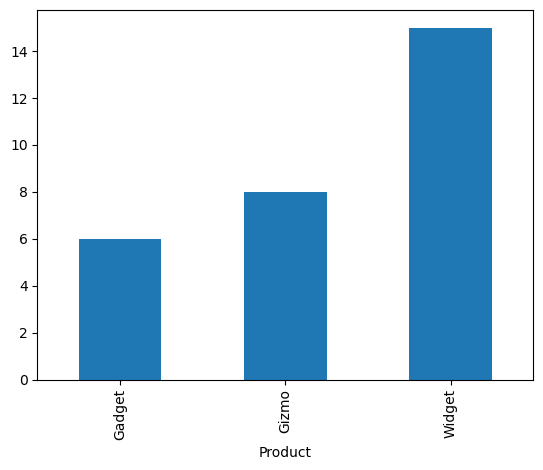

In [175]:
# Plotting the bar chart
products_chart = sum_products_sold.plot.bar()

Based from the given visualization, we can say that the Widget is the product with the highest number of sold units.

In [176]:
# Additionally, I could also make a chart on which product has the highest transaction amount in the given dataset.
# This way, the business will be able to maximize which product he could sell with a high price.
# Using the same step
sum_products_profit = customer_sales.groupby('Product')['FinalTransactionAmount'].sum()

In [177]:
sum_products_profit

Product
Gadget    101.00
Gizmo     111.75
Widget    150.00
Name: FinalTransactionAmount, dtype: float64

<Axes: xlabel='Product'>

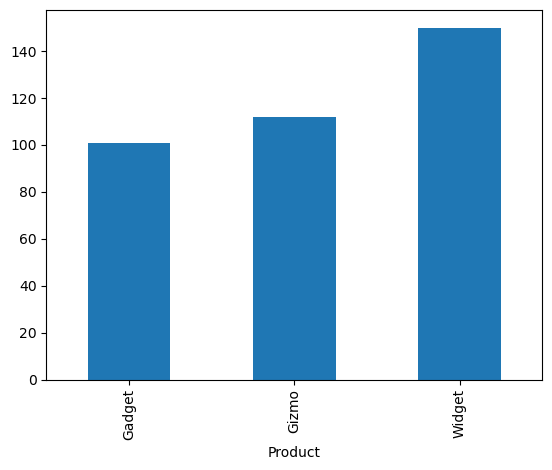

In [178]:
# Plotting the chart
sum_products_profit.plot.bar()

Based on the visualization, the Widget is once again the one with the most number of transaction, therefore we can safely conclude that Widget is the product that the business should invest more, and they could raise its price to earn more profit since customers like it more based on the previous bar chart.